In [1]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import warnings
from time import time
from sklearn.decomposition import PCA 

In [2]:
warnings.filterwarnings("ignore")
fat_data = pd.read_csv('fat.csv', header = None)
fat_data.columns = ['Gender',
               'Age',
               'Height',
               'Weight',
               'family_history_with_overweight',#
              'FAVC',
              'FCVC',
              'NCP',
              'CAEC',
              'SMOKE',#
              'CH2O',#
              'SCC',
              'FAF',
              'TUE',#
              'CALC',#
              'MTRANS',#
               'NObeyesdad']
fat_data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [3]:
#資料前處理
le=LabelEncoder()
for col in fat_data[['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight','FAVC','FCVC','NCP','CAEC','SMOKE','CH2O','SCC','FAF','TUE','CALC','MTRANS','NObeyesdad']]:
    fat_data[col]=le.fit_transform(fat_data[col])
fat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Gender                          2111 non-null   int32
 1   Age                             2111 non-null   int64
 2   Height                          2111 non-null   int64
 3   Weight                          2111 non-null   int64
 4   family_history_with_overweight  2111 non-null   int32
 5   FAVC                            2111 non-null   int32
 6   FCVC                            2111 non-null   int64
 7   NCP                             2111 non-null   int64
 8   CAEC                            2111 non-null   int32
 9   SMOKE                           2111 non-null   int32
 10  CH2O                            2111 non-null   int64
 11  SCC                             2111 non-null   int32
 12  FAF                             2111 non-null   int64
 13  TUE

In [4]:
t= time()
X= fat_data.drop(['NObeyesdad', 'SMOKE', 'family_history_with_overweight', 'CH2O', 'TUE', 'CALC', 'MTRANS'], axis= 1)
Y= fat_data['NObeyesdad']



In [5]:
def PCA_illustrator(X , label, title):
    from sklearn.decomposition import PCA
    from matplotlib.font_manager import FontProperties
    plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
    plt.rcParams['axes.unicode_minus'] = False

    pca = PCA(2)
    data = pca.fit_transform(X)
    uniq = np.unique(label)
    plt.figure(figsize=(10,10))
    for i in uniq:
        plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
    #This is done to find the centroid for each clusters.
    plt.legend()
    plt.title(title)
    plt.show()

In [6]:
#求眾數
def mode(a):
    counts = np.bincount(a)  
    return np.argmax(counts)

In [7]:
#purity計算
def purity_score(y_true, y_pred):
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

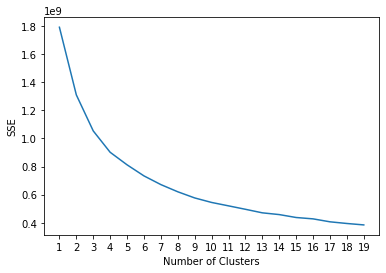

In [8]:
#利用SSE計算分群量
sse= []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 20), sse)
plt.xticks(range(1, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

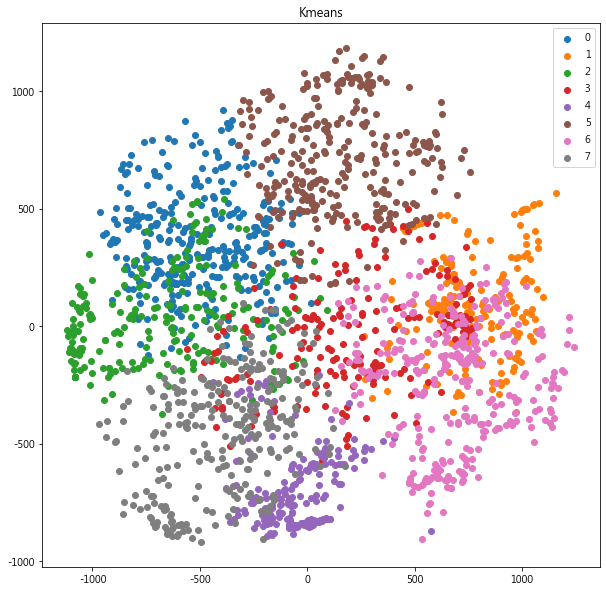

Purity: 0.4647086688773093
done in 2.9320552349090576 seconds


In [9]:
#KMeans
#Cen()
kmeans = KMeans(n_clusters=8)
kmeans.fit(X)

centers = kmeans.cluster_centers_
for i in range(4):
        index = Y == i
        p = kmeans.predict(X)
        pp = mode(p) 
        # 相應的調整類別標號，以正確預測

K_y_pre = kmeans.predict(X)

PCA_illustrator(X, K_y_pre, "Kmeans")
####################################################
#純度
K_purity = purity_score(Y, K_y_pre)
print('Purity:', K_purity)
####################################################
#時間
print("done in {0} seconds".format(time() - t))

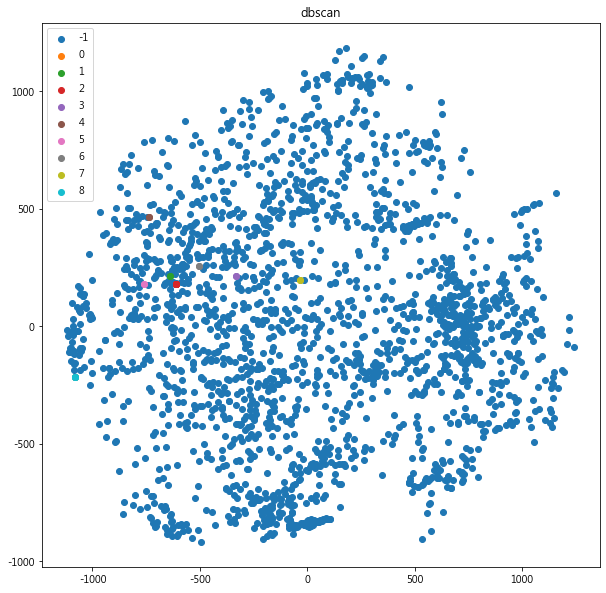

Purity: 0.18190431075319755
done in 3.210179328918457 seconds


In [10]:
dbscan = DBSCAN(eps=0.5, min_samples=2)
dbscan.fit(X)
label_pred = dbscan.labels_

DB_purity = purity_score(Y, label_pred)
PCA_illustrator(X, label_pred, "dbscan")


####################################################
#純度
print('Purity:', DB_purity)

####################################################
#時間
print("done in {0} seconds".format(time() - t))

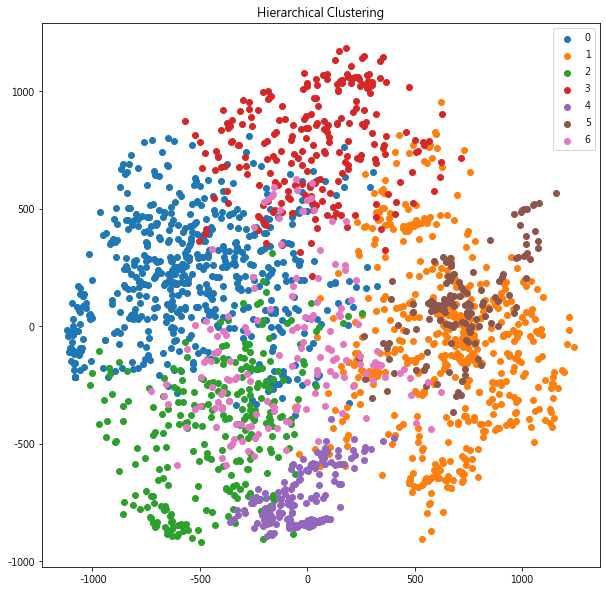

Purity: 0.46186641402179063
done in 3.619539737701416 seconds


In [11]:
#階層式分群
ml=AgglomerativeClustering(n_clusters=7,affinity='euclidean',linkage='ward')
ml.fit_predict(X)
c=ml.fit_predict(X)

H_purity = purity_score(Y, c)
PCA_illustrator(X, c, "Hierarchical Clustering")
####################################################
#純度
print('Purity:', H_purity)

####################################################
#時間
print("done in {0} seconds".format(time() - t))

Text(0.5, 1.0, 'Hierarchical Clustering')


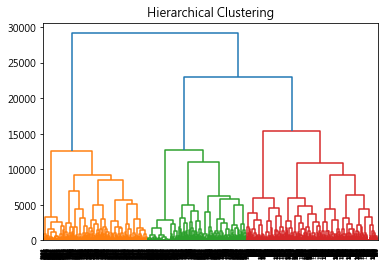

In [12]:
#分層樹
dis=sch.linkage(X,metric='euclidean',method='ward')
sch.dendrogram(dis)
print(plt.title('Hierarchical Clustering'))